In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random

import scipy.stats as st

In [2]:
# 1: procedure BLB

k = 10 #number of partitions
r = 500 #bootstrap iterations

# tau: estimators
tau = np.zeros([k,r])

def estimator_mean(data):
    return np.mean(data)

def estimator_var(data):
    return np.var(data)

Bag of Little Bootstraps method

In [3]:
def blb(estimator_func, data, n):
    theta_vec = []
    sigma_sq_vec = []
    # randomly partition X into k subsets
    random.shuffle(data)
    partitions = [data[i:i + k] for i in range(0, len(data), k)]

    # range for randint
    low=0
    high=len(partitions[0]) #don't need to do b-1 because upper bound is exclusive

    # for each partition
    for i in range(k):
    
        b = len(partitions[i]) 
    
        # for a partition, create r subsets
        for c in range(r):
            I = np.random.randint(low, high, size=n)
            replicate = data[I]
        
        
            tau[i,c] = estimator_func(replicate)  
           
        low = low + b
        high = high + b
        
    # mean and var of estimators for each prtition, not the data        
    theta_vec = np.mean(tau,axis=1)
    sigma_sq_vec = np.var(tau,axis=1) #var

    # should be private. for now, non private
    theta = np.mean(theta_vec)
    sigma_sq = np.mean(sigma_sq_vec) #var

    return (theta, sigma_sq)

graphing the mean and variance of estimators

In [4]:
def plot(true_theta, theta_hat_vec, sigma_sq_hat_vec):
    # ploting mean: normal coordinates
#     plt.axhline(y=true_theta, color='green', linestyle=':', label = 'target')
#     plt.plot([str(e) for e in list_of_n], theta_hat_vec, 
#              marker='o', color='blue', label='mean of estimates')
#     plt.xlabel("size of n")
#     plt.ylabel("mean (theta) of estimator")
#     plt.legend()
#     plt.show()

    # plotting in log axes cuts off the first datapoint. Not sure how to work around it, so I just hardocded the first "throwaway" point
    theta_hat_vec.insert(0, true_theta)
    sigma_sq_hat_vec.insert(0, 1)
    list_of_n.insert(0, 1)

    # plotting mean: log x axis
    plt.xscale('log')
    plt.axhline(y=true_theta, color='green', linestyle=':', label = 'target')
    plt.plot([str(e) for e in list_of_n], theta_hat_vec, 
             marker='o', color='blue', label='mean of estimates')
    plt.xlabel("size of n")
    plt.ylabel("mean (theta) of estimator")
    plt.legend()
    plt.show()

    #plotting variance: log log graph
#     plt.loglog([str(e) for e in list_of_n], sigma_sq_hat_vec, 
#              marker='o', color='blue', label='variance of estimates')
#     plt.xlabel("size of n")
#     plt.ylabel("variance (sigma sq) of estimator")
#     plt.legend()
#     plt.show()
    
    #plotting variance: manually changing axes scale
    plt.xscale('log')
    plt.xscale('log')
    plt.plot([str(e) for e in list_of_n], sigma_sq_hat_vec, 
             marker='o', color='blue', label='variances of estimates')
    plt.xlabel("size of n")
    plt.ylabel("variance (sigma sq) of estimator")
    plt.legend()
    plt.show()
    

Constructing Confidence Intervals method

In [38]:
def construct_CI(true_theta, theta_hat_vec, sigma_sq_hat_vec):
    ci_vec = []
    count = 0 

    for i in range(len(theta_hat_vec)):
        print(theta_hat_vec[i])
        ci = st.norm.interval(alpha=0.95, loc=theta_hat_vec[i], scale=np.sqrt(sigma_sq_hat_vec[i]))
        ci_vec.append(ci)
        print(ci)

        # checking to see if true theta is in CI
        if ci[0] <= true_theta <= ci[1]:
            count += 1

    print("success rate: if true theta is in CI " + str(count/len(ci_vec)))

    for ci in ci_vec:
        print(ci[1]-ci[0])


Estimating mean for Gaussian distribution

190.13026347029833
(186.53711346603046, 193.7234134745662)
188.49232695609476
(185.99029881605168, 190.99435509613784)
190.93584698310588
(188.88662549166264, 192.9850684745491)
189.93853943702857
(188.1255919581281, 191.75148691592904)
success rate: if true theta is in CI 1.0
7.1863000085357385
5.004056280086161
4.098442982886468
3.625894957800938


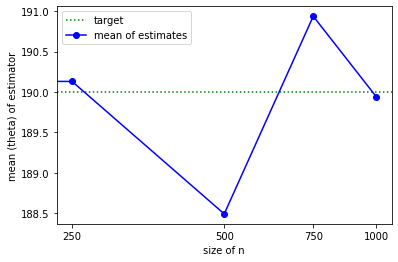

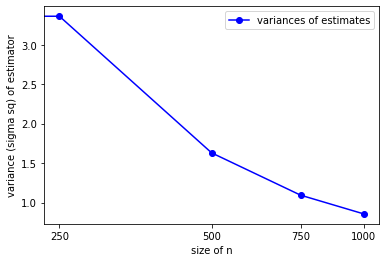

In [16]:
theta_hat_vec = []
sigma_sq_hat_vec = []

true_mean = 190
true_sd = 30

T = 25

#list_of_n = [100, 250, 500, 750, 1000, 1250]
list_of_n = [250, 500, 750, 1000]

#estimating mean of gaussian
for n in list_of_n:
    trials_theta = []
    trials_sigma_sq = []
    
    for t in range(T):
        data = np.random.normal(true_mean, true_sd, n)
        theta, sigma_sq = blb(estimator_mean, data, n)
        trials_theta.append(theta)
        trials_sigma_sq.append(sigma_sq)
    
    theta_hat_vec.append(np.mean(trials_theta))
    sigma_sq_hat_vec.append(np.mean(trials_sigma_sq))
    

construct_CI(true_mean, theta_hat_vec, sigma_sq_hat_vec)
plot(true_mean, theta_hat_vec, sigma_sq_hat_vec)


Estimating variance for Gaussian distribution

817.9937708073207
(685.3531684219373, 950.6343731927042)
843.5441557778331
(742.5876209573488, 944.5006905983174)
829.491386631548
(752.9575056955728, 906.0252675675233)
829.5913569535795
(762.5128301453811, 896.6698837617779)
success rate: if true theta is in CI 0.75
265.28120477076686
201.91306964096862
153.06776187195055
134.15705361639675


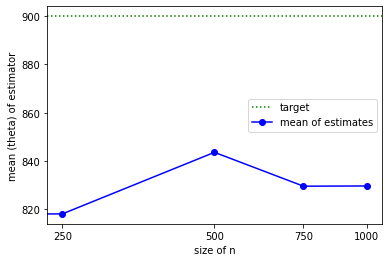

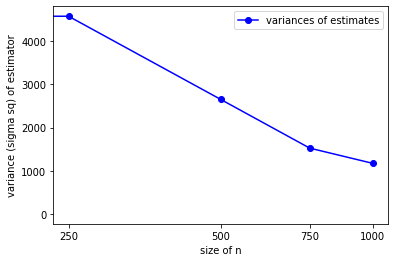

In [17]:
theta_hat_vec = []
sigma_sq_hat_vec = []

true_mean = 190
true_sd = 30
true_var = true_sd**2

T = 25

#list_of_n = [100, 250, 500, 750, 1000, 1250]
list_of_n = [250, 500, 750, 1000]


#estimating variance of gaussian
for n in list_of_n:
    trials_theta = []
    trials_sigma_sq = []
    
    for t in range(T):
        data = np.random.normal(true_mean, true_sd, n)
        theta, sigma_sq = blb(estimator_var, data, n)
        trials_theta.append(theta)
        trials_sigma_sq.append(sigma_sq)
        
    theta_hat_vec.append(np.mean(trials_theta))
    sigma_sq_hat_vec.append(np.mean(trials_sigma_sq))

construct_CI(true_var, theta_hat_vec, sigma_sq_hat_vec)
plot(true_var, theta_hat_vec, sigma_sq_hat_vec)

Estimating mean for Poisson distribution

3.999295456
(3.767007658207887, 4.231583253792113)
3.956947424
(3.7945673646434406, 4.119327483356559)
3.978253248
(3.8411115882746865, 4.115394907725314)
3.9756551200000003
(3.8566967050910947, 4.0946135349089055)
success rate: if true theta is in CI 1.0
0.46457559558422634
0.32476011871311883
0.27428331945062734
0.2379168298178107


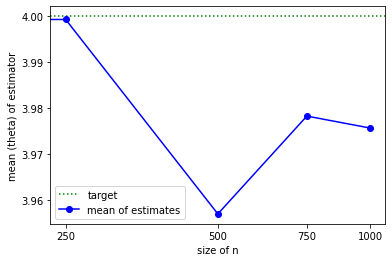

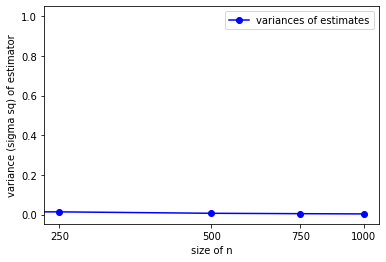

In [18]:
theta_hat_vec = []
sigma_sq_hat_vec = []

T = 25 #trials

true_theta = 4


#list_of_n = [100, 250, 500, 750, 1000, 1250]
list_of_n = [250, 500, 750, 1000]


#estimating mean of poisson
for n in list_of_n:
    trials_theta = []
    trials_sigma_sq = []
    # for t in T
    for t in range(T):
        data = np.random.poisson(true_theta, n)
        theta, sigma_sq = blb(estimator_mean, data, n) #returns mean and variance of estimator
        trials_theta.append(theta)
        trials_sigma_sq.append(sigma_sq)
        
    theta_hat_vec.append(np.mean(trials_theta))
    sigma_sq_hat_vec.append(np.mean(trials_sigma_sq))

construct_CI(true_theta, theta_hat_vec, sigma_sq_hat_vec)
plot(true_theta, theta_hat_vec, sigma_sq_hat_vec)


collecting data in csv record format (estimating mean of Poisson)

In [43]:
import csv
header = ['n', 'T', 'true_parameter', 'estimator_mean', 'estimator_variance']

T = 25 #trials

true_theta = 4

#list_of_n = [100, 250, 500, 750, 1000, 1250]
list_of_n = [250, 500, 750, 1000]
        
with open('BLB_data.csv', 'w', encoding='UTF8', newline='') as file:
    writer = csv.writer(file)

    # write the header
    writer.writerow(header)

    for n in list_of_n:
        for t in range(T):
            data = np.random.poisson(true_theta, n)
            theta, sigma_sq = blb(estimator_mean, data, n) #returns mean and variance of estimator
            row = [n, t, true_theta, theta, sigma_sq]
        
            # write the data
            writer.writerow(row)

3.962279712
(3.7277611469636502, 4.19679827703635)
4.0176299360000005
(3.851434987835192, 4.1838248841648085)
3.994854346666667
(3.860356648853282, 4.129352044480052)
3.994347855999999
(3.8736231533669323, 4.115072558633066)
success rate: if true theta is in CI 1.0
0.4690371300726994
0.33238989632961635
0.26899539562677033
0.24144940526613334


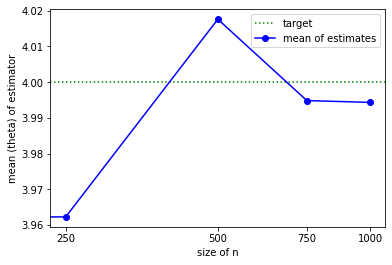

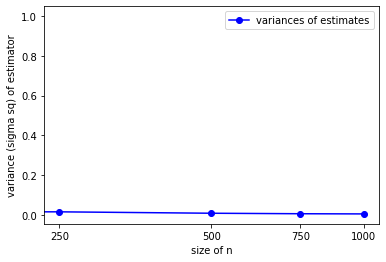

In [44]:
import pandas as pd

df = pd.read_csv("BLB_data.csv")
# print(df)

theta_hat_vec = []
sigma_sq_hat_vec = []

for n_val in list_of_n:
#     print(df.loc[df.n==n_val, :])
#     theta_hat = df.loc[df.n==n_val, :]['estimator_mean'].mean()
#     print(theta_hat)
    theta_hat_vec.append(df.loc[df.n==n_val, :]['estimator_mean'].mean())
    sigma_sq_hat_vec.append(df.loc[df.n==n_val, :]['estimator_variance'].mean())

construct_CI(true_theta, theta_hat_vec, sigma_sq_hat_vec)
plot(true_theta, theta_hat_vec, sigma_sq_hat_vec)